### Customer Churn Analysis 

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [118]:
df = pd.read_excel('telecom_customer_churn.xlsx')

In [92]:
df.head(3)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Competitor,Competitor had better devices
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Dissatisfaction,Product dissatisfaction
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Dissatisfaction,Network reliability


In [99]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                  

In [114]:
df = df.dropna(inplace = True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5517 non-null   object 
 1   Gender                             5517 non-null   object 
 2   Age                                5517 non-null   int64  
 3   Married                            5517 non-null   object 
 4   Number of Dependents               5517 non-null   int64  
 5   City                               5517 non-null   object 
 6   Zip Code                           5517 non-null   int64  
 7   Latitude                           5517 non-null   float64
 8   Longitude                          5517 non-null   float64
 9   Number of Referrals                5517 non-null   int64  
 10  Tenure in Months                   5517 non-null   int64  
 11  Offer                              5517 non-null   objec

In [120]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000
mean,46.516223,0.471633,93495.197752,36.214762,-119.767688,1.950517,32.239623,25.472001,26.189958,63.629799,2272.297868,1.835693,6.827986,748.305324,3025.595485
std,16.759960,0.964265,1852.284554,2.472424,2.158523,2.989694,24.552246,14.230680,19.586585,31.256171,2265.895298,7.650003,24.970939,845.179032,2864.499022
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.400000
25%,32.000000,0.000000,92104.000000,33.994676,-121.809955,0.000000,9.000000,13.140000,13.000000,30.400000,384.500000,0.000000,0.000000,67.470000,592.150000
50%,46.000000,0.000000,93522.000000,36.245926,-119.631072,0.000000,29.000000,25.620000,21.000000,70.100000,1389.850000,0.000000,0.000000,401.440000,2104.000000
75%,60.000000,0.000000,95329.000000,38.169605,-117.974404,3.000000,55.000000,37.860000,30.000000,89.800000,3778.200000,0.000000,0.000000,1187.040000,4782.820000
max,80.000000,9.000000,96148.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [121]:
# Define the bin edges for the age segments
bin_edges = [19, 35, 50, 65, 80]

# Define the labels for the age segments
bin_labels = ['19-35', '36-50', '51-65', '66-80']

# Create a new column 'Age Group' with the age segments
df['Age Group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new 'Age Group' column
#print(df)

In [122]:
# Distribution of customers by gender
gender_distribution = (df['Gender'].value_counts(normalize=True)*100).round(2)

# Distribution of customers by age
Age_Group_distribution = (df['Age Group'].value_counts(normalize=True)*100).round(2)

# Distribution of customers by marital status
marital_status_distribution = (df['Married'].value_counts(normalize=True)*100).round(2)

# Distribution of customers by number of dependents
dependents_distribution = (df['Number of Dependents'].value_counts(normalize=True)*100).round(2)

# Print the distributions
print("Distribution of Customers by Gender:")
print(gender_distribution)
print("\nDistribution of Customers by Age Group:")
print(Age_Group_distribution)
print("\nDistribution of Customers by Marital Status:")
print(marital_status_distribution)
print("\nDistribution of Customers by Number of Dependents:")
print(dependents_distribution)

Distribution of Customers by Gender:
Male      50.75
Female    49.25
Name: Gender, dtype: float64

Distribution of Customers by Age Group:
19-35    29.09
36-50    28.80
51-65    26.61
66-80    15.50
Name: Age Group, dtype: float64

Distribution of Customers by Marital Status:
No     51.13
Yes    48.87
Name: Married, dtype: float64

Distribution of Customers by Number of Dependents:
0    76.62
1     8.10
2     7.59
3     7.34
4     0.13
5     0.09
6     0.05
7     0.04
9     0.02
8     0.02
Name: Number of Dependents, dtype: float64


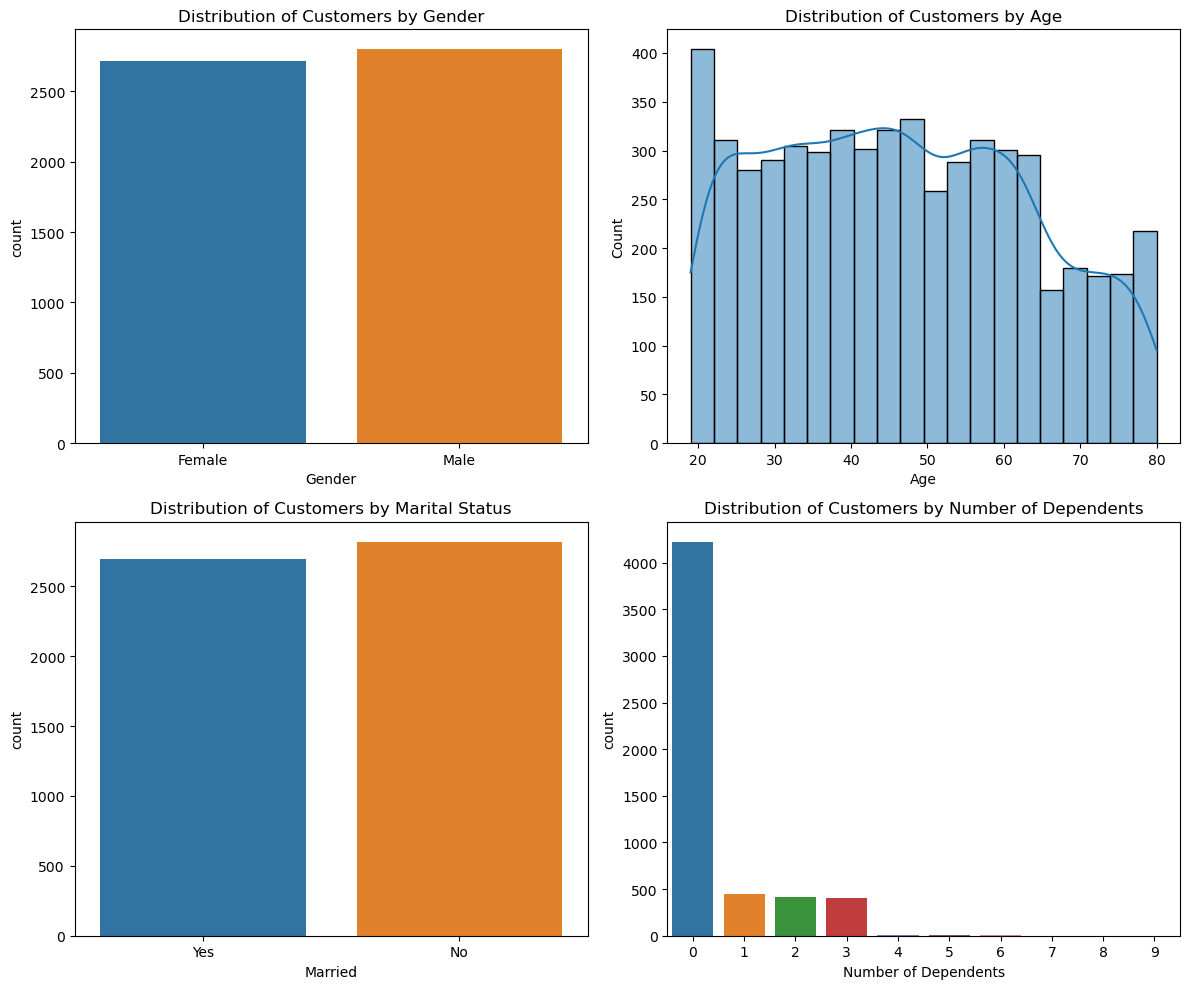

In [17]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribution of customers by gender
sns.countplot(x='Gender', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Customers by Gender')

# Plot distribution of customers by age
sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Customers by Age')

# Plot distribution of customers by marital status
sns.countplot(x='Married', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Customers by Marital Status')

# Plot distribution of customers by number of dependents
sns.countplot(x='Number of Dependents', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Customers by Number of Dependents')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


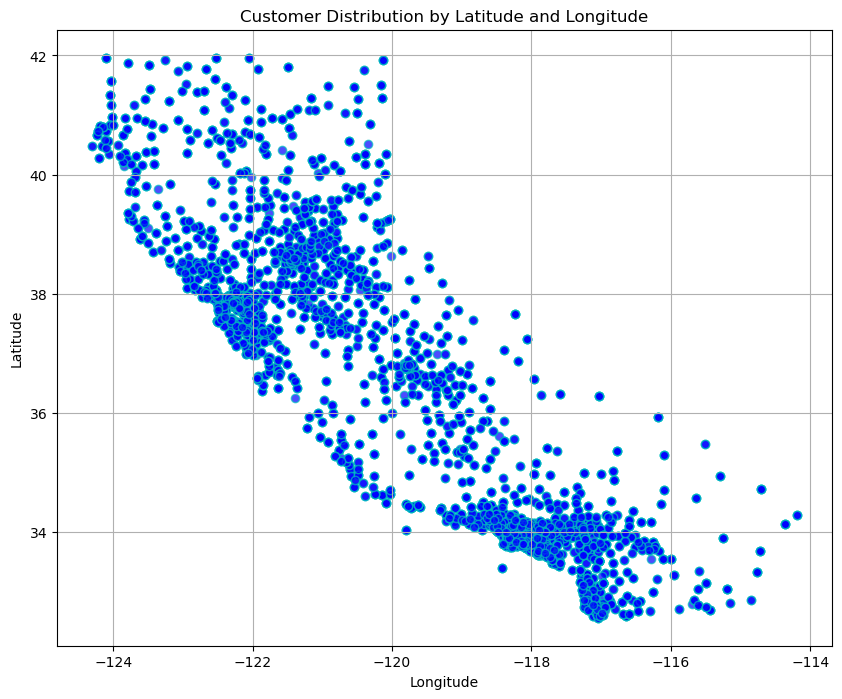

In [106]:
# Plot customer distribution based on latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.7, c='b', edgecolors='c')
plt.title('Customer Distribution by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [107]:
#What is the average tenure of customers in months?
average_tenure = df[['Tenure in Months']].mean()

print("Average tenure of customers:", average_tenure, "months")

Average tenure of customers: Tenure in Months    32.239623
dtype: float64 months


<Axes: title={'center': 'Mean Tenure in Months by Number of Depenents'}, xlabel='Number of Depenents', ylabel='Tenure in Months'>

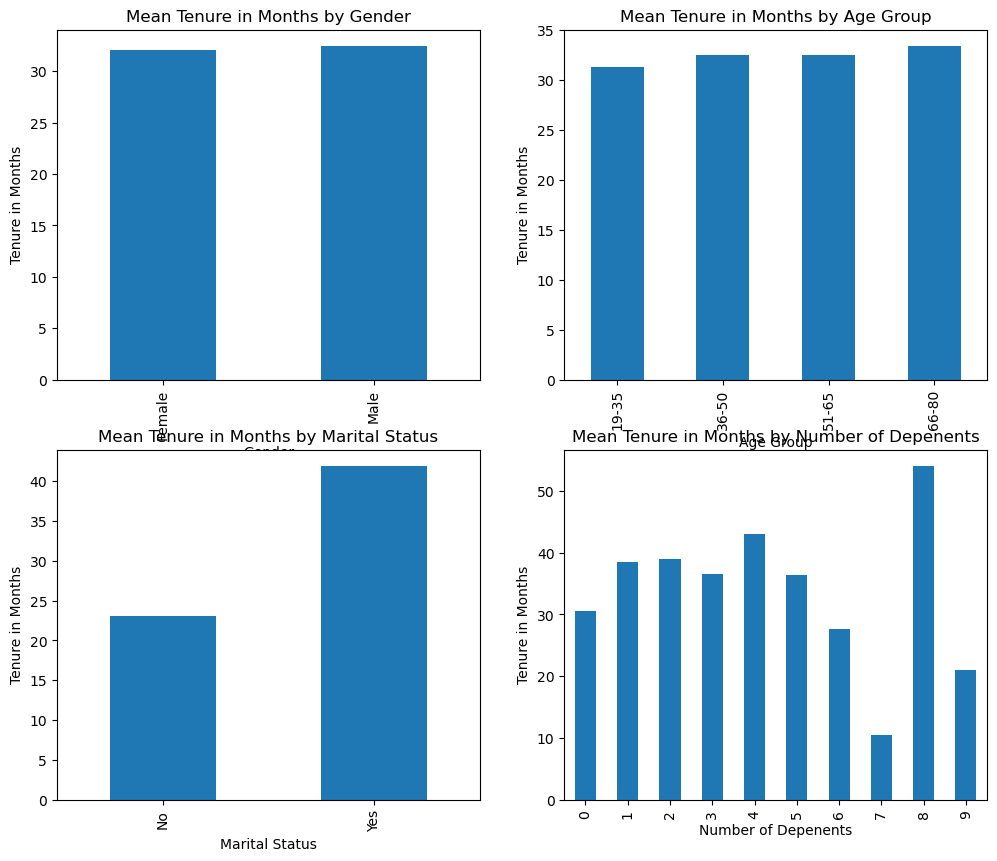

In [20]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#How does tenure vary across different demographic segments - GENDER?
Tenure_in_months_byGender = df.groupby(['Gender']).mean()['Tenure in Months']
Tenure_in_months_byGender.plot(kind = 'bar', xlabel = 'Gender', ylabel = 'Tenure in Months', ax = axes[0,0],title = 'Mean Tenure in Months by Gender')

#How does tenure vary across different demographic segments - AGE?
Tenure_in_months_byAge_Group = df.groupby(['Age Group']).mean()['Tenure in Months']
Tenure_in_months_byAge_Group.plot(kind = 'bar', xlabel = 'Age Group', ylabel = 'Tenure in Months',ax = axes[0,1], title = 'Mean Tenure in Months by Age Group')

#How does tenure vary across different demographic segments - MARITAL STATUS?
Tenure_in_months_byMarital_Status = df.groupby(['Married']).mean()['Tenure in Months']
Tenure_in_months_byMarital_Status.plot(kind = 'bar', xlabel = 'Marital Status', ylabel = 'Tenure in Months',ax = axes[1,0], title = 'Mean Tenure in Months by Marital Status')

#How does tenure vary across different demographic segments - NUMBER OF DEPENDENTS?
Tenure_in_months_byNumber_of_Depenents = df.groupby(['Number of Dependents']).mean()['Tenure in Months']
Tenure_in_months_byNumber_of_Depenents.plot(kind = 'bar', xlabel = 'Number of Depenents', ylabel = 'Tenure in Months',ax = axes[1,1], title = 'Mean Tenure in Months by Number of Depenents')

<Axes: title={'center': 'Mean Tenure in Months by Number of Depenents'}, xlabel='Number of Depenents', ylabel='Tenure in Months'>

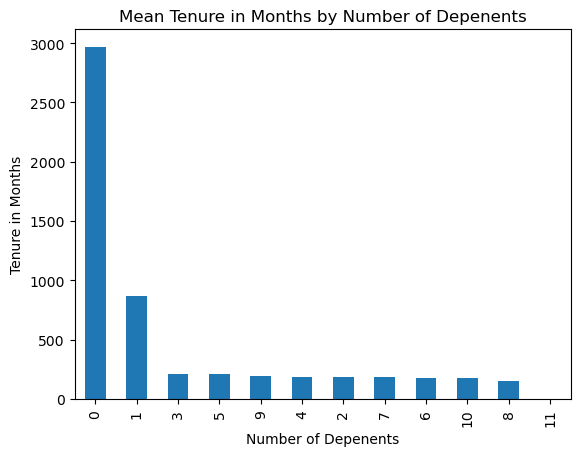

In [21]:
#What is the distribution of the number of referrals made by customers?
df['Number of Referrals'].value_counts().plot(kind = 'bar',
                                             xlabel = 'Number of Depenents', 
                                              ylabel = 'Tenure in Months',
                                              title = 'Mean Tenure in Months by Number of Depenents')

In [22]:
# Calculate the percentage of customers who have opted for phone service
phone_service_percentage = (df['Phone Service'].value_counts(normalize=True) * 100).round(2)

# Calculate the percentage of customers who have opted for multiple lines
multiple_lines_percentage = (df['Multiple Lines'].value_counts(normalize=True) * 100).round(2)

# Calculate the percentage of customers who have opted for internet service
internet_service_percentage = (df['Internet Service'].value_counts(normalize=True) * 100).round(2)

# Calculate the percentage of customers who have opted for internet service
internet_Type_percentage = (df['Internet Type'].value_counts(normalize=True) * 100).round(2)

# Display the percentages
print("Percentage of Customers Who Have Opted for Phone Service:")
print(phone_service_percentage)
print("\nPercentage of Customers Who Have Opted for Multiple Lines:")
print(multiple_lines_percentage)
print("\nPercentage of Customers Who Have Opted for Internet Service:")
print(internet_service_percentage)
print("\nPercentage of Customers Who Have Opted for Internet Type:")
print(internet_Type_percentage)

Percentage of Customers Who Have Opted for Phone Service:
Yes    90.39
No      9.61
Name: Phone Service, dtype: float64

Percentage of Customers Who Have Opted for Multiple Lines:
No     53.34
Yes    46.66
Name: Multiple Lines, dtype: float64

Percentage of Customers Who Have Opted for Internet Service:
Yes    78.32
No     21.68
Name: Internet Service, dtype: float64

Percentage of Customers Who Have Opted for Internet Type:
Fiber Optic    55.01
DSL            29.94
Cable          15.04
Name: Internet Type, dtype: float64


<Axes: title={'center': 'Distribution of Use of Internet Types'}, xlabel='Internet Type', ylabel='Usage of Types'>

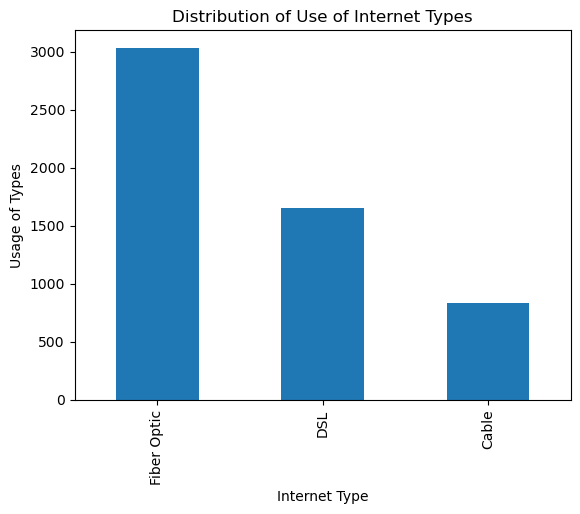

In [23]:
#Which internet type (DSL, Fiber Optic, Cable) is most commonly used by customers?

df['Internet Type'].value_counts().plot(kind = 'bar',
                                             xlabel = 'Internet Type', 
                                              ylabel = 'Usage of Types',
                                              title = 'Distribution of Use of Internet Types')

In [24]:
#What are the average monthly charges for various services like long-distance calls, streaming TV, online security, etc.?

# Calculate the mean of customers who have Online Security
Online_Security = df.groupby(['Online Security'])['Monthly Charge'].mean().round(2)

# Calculate the mean of customers who have Online Backup
Online_Backup = df.groupby(['Online Backup'])['Monthly Charge'].mean().round(2)

# Calculate the mean of customers who have Device Protection Plan
Device_Protection_Plan = df.groupby(['Device Protection Plan'])['Monthly Charge'].mean().round(2)

# Calculate the mean of customers who have Premium Tech Support
Premium_Tech_Support = df.groupby(['Premium Tech Support'])['Monthly Charge'].mean().round(2)

# Calculate the mean of customers who have Streaming TV
Streaming_TV = df.groupby(['Streaming TV'])['Monthly Charge'].mean().round(2)

# Calculate the mean of customers who have Streaming Movies
Streaming_Movies = df.groupby(['Streaming Movies'])['Monthly Charge'].mean().round(2)

# Calculate the mean of customers who have Streaming Music
Streaming_Music = df.groupby(['Streaming Music'])['Monthly Charge'].mean().round(2)

# Calculate the mean of customers who have Unlimited Data
Unlimited_Data = df.groupby(['Unlimited Data'])['Monthly Charge'].mean().round(2)


# Display the percentages
print("Mean of customers who have Online Security:")
print(Online_Security)
print("\nmean of customers who have Online Backup:")
print(Online_Backup)
print("\nmean of customers who have Device Protection Plan:")
print(Device_Protection_Plan)
print("\nmean of customers who have Premium Tech Support:")
print(Premium_Tech_Support)
print("\nMean of customers who have Streaming TV:")
print(Streaming_TV)
print("\nMean of customers who have Streaming Movies:")
print(Streaming_Movies)
print("\nMean of customers who have Streaming Music:")
print(Streaming_Music)
print("\nMean of customers who have Unlimited Data:")
print(Unlimited_Data)

Mean of customers who have Online Security:
Online Security
No     63.33
Yes    64.15
Name: Monthly Charge, dtype: float64

mean of customers who have Online Backup:
Online Backup
No     64.23
Yes    62.87
Name: Monthly Charge, dtype: float64

mean of customers who have Device Protection Plan:
Device Protection Plan
No     63.83
Yes    63.37
Name: Monthly Charge, dtype: float64

mean of customers who have Premium Tech Support:
Premium Tech Support
No     63.78
Yes    63.37
Name: Monthly Charge, dtype: float64

Mean of customers who have Streaming TV:
Streaming TV
No     63.06
Yes    64.22
Name: Monthly Charge, dtype: float64

Mean of customers who have Streaming Movies:
Streaming Movies
No     63.44
Yes    63.82
Name: Monthly Charge, dtype: float64

Mean of customers who have Streaming Music:
Streaming Music
No     63.36
Yes    63.96
Name: Monthly Charge, dtype: float64

Mean of customers who have Unlimited Data:
Unlimited Data
No     64.52
Yes    63.48
Name: Monthly Charge, dtype: flo

In [25]:
#What is the overall churn rate among the customers

# Count the number of churned customers
churned_customers = df['Customer Status'].value_counts().get('Churned', 0)

# Calculate the total number of customers
total_customers = len(df)

# Calculate the overall churn rate
overall_churn_rate = (churned_customers / total_customers) * 100

# Display the overall churn rate
print("Overall Churn Rate: {:.2f}%".format(overall_churn_rate))

Overall Churn Rate: 26.97%


<Axes: title={'center': 'Distribution of Churn Category'}, xlabel='Churn Category', ylabel='Category Frequencies'>

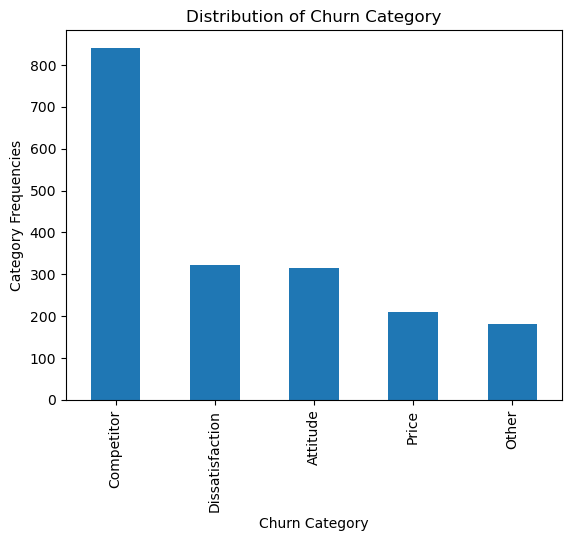

In [113]:
df['Churn Category'].value_counts().plot(kind = 'bar',
                                             xlabel = 'Churn Category', 
                                              ylabel = 'Category Frequencies',
                                              title = 'Distribution of Churn Category')

In [112]:
# Count the occurrences of each churn reason
churn_reason_counts = df['Churn Reason'].value_counts()

# Display the most common reasons cited for churn
most_common_reasons = churn_reason_counts.head(5)  # Display top 5 reasons
print("Most Common Reasons Cited for Churn:")
print(most_common_reasons)

Most Common Reasons Cited for Churn:
Competitor had better devices    313
Competitor made better offer     311
Attitude of support person       220
Don't know                       130
Competitor offered more data     117
Name: Churn Reason, dtype: int64


In [28]:
# Calculate the average monthly charge
average_monthly_charge = df['Monthly Charge'].mean()

# Calculate the total charges incurred by customers
total_charges = df['Total Charges'].sum()

# Display the average monthly charge and total charges
print("Average Monthly Charge: ${:.2f}".format(average_monthly_charge))
print("Total Charges Incurred by Customers: ${:.2f}".format(total_charges))

Average Monthly Charge: $63.63
Total Charges Incurred by Customers: $12536267.34


In [35]:
#How do total revenue and total refunds vary across different customer segments?

# Get a segment and calculate the sum of total revenue and total refunds for each group
segment_summary = df.groupby('Age Group')[['Total Revenue', 'Total Refunds']].sum()

# Display the summary statistics
print("Summary Statistics of Total Revenue and Total Refunds Across Different Customer Segments:")
print(segment_summary)

Summary Statistics of Total Revenue and Total Refunds Across Different Customer Segments:
           Total Revenue  Total Refunds
Age Group                              
19-35         4615416.58        2717.80
36-50         4618581.79        2562.93
51-65         4244115.06        2791.77
66-80         3034684.74        1963.09


In [36]:
#How do total revenue and total refunds vary across different customer segments?

# Get a segment and calculate the sum of total revenue and total refunds for each group
segment_summary = df.groupby('Married')[['Total Revenue', 'Total Refunds']].sum()

# Display the summary statistics
print("Summary Statistics of Total Revenue and Total Refunds Across Different Customer Segments:")
print(segment_summary)

Summary Statistics of Total Revenue and Total Refunds Across Different Customer Segments:
         Total Revenue  Total Refunds
Married                              
No          5893526.91        4371.53
Yes        10798683.38        5755.99


In [37]:
# Get a segment and calculate the sum of total revenue and total refunds for each group
segment_summary = df.groupby('Customer Status')[['Total Revenue', 'Total Refunds']].sum()

# Display the summary statistics
print("Summary Statistics of Total Revenue and Total Refunds Across Different Customer Segments:")
print(segment_summary)

Summary Statistics of Total Revenue and Total Refunds Across Different Customer Segments:
                 Total Revenue  Total Refunds
Customer Status                              
Churned             2953926.97        2041.68
Joined                44036.46         108.35
Stayed             13694246.86        7977.49


In [34]:
# Get a segment and calculate the sum of total revenue and total refunds for each group
segment_summary = df.groupby('Gender')[['Total Revenue', 'Total Refunds']].sum()

# Display the summary statistics
print("Summary Statistics of Total Revenue and Total Refunds Across Different Customer Segments:")
print(segment_summary)

Summary Statistics of Total Revenue and Total Refunds Across Different Customer Segments:
        Total Revenue  Total Refunds
Gender                              
Female     8169263.30        4838.81
Male       8522946.99        5288.71


In [43]:
#How do total revenue and total refunds vary across different customer segments?
df.groupby(['Gender','Age Group'])[['Total Revenue', 'Total Refunds']].sum()

Total Revenue  Total Refunds
Gender Age Group                              
Female 19-35         2290031.75        1272.97
       36-50         2258488.28        1148.58
       51-65         2034257.18        1431.35
       66-80         1501712.17         947.04
Male   19-35         2325384.83        1444.83
       36-50         2360093.51        1414.35
       51-65         2209857.88        1360.42
       66-80         1532972.57        1016.05

In [41]:
#How do total revenue and total refunds vary across different customer segments?
df.groupby(['Gender','Contract'])[['Total Revenue', 'Total Refunds']].sum()

Total Revenue  Total Refunds
Gender Contract                                    
Female Month-to-Month     2324867.41        2059.84
       One Year           2454681.57        1103.32
       Two Year           3389714.32        1675.65
Male   Month-to-Month     2539846.23        2303.99
       One Year           2404803.06        1080.82
       Two Year           3578297.70        1903.90

In [42]:
#How do total revenue and total refunds vary across different customer segments?
df.groupby(['Gender','Payment Method'])[['Total Revenue', 'Total Refunds']].sum()

Total Revenue  Total Refunds
Gender Payment Method                               
Female Bank Withdrawal     4875438.54        3046.43
       Credit Card         3059658.89        1655.96
       Mailed Check         234165.87         136.42
Male   Bank Withdrawal     5154013.57        3143.99
       Credit Card         3191938.50        1935.52
       Mailed Check         176994.92         209.20

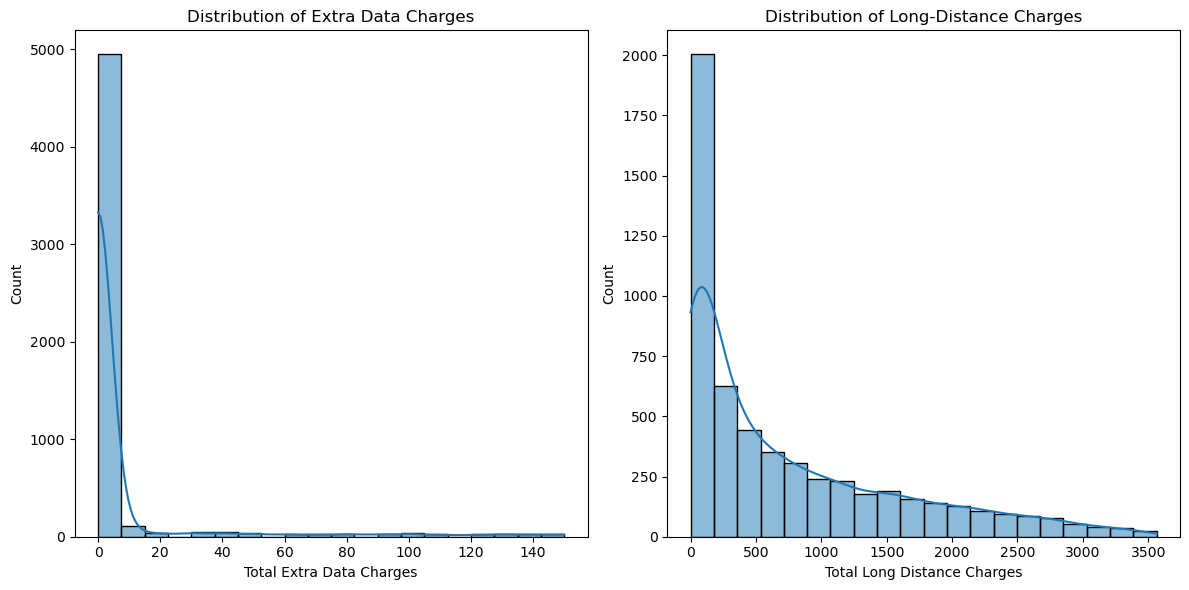

In [111]:
#Are there any notable patterns in extra data charges and long-distance charges?

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of extra data charges
sns.histplot(df['Total Extra Data Charges'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Extra Data Charges')
axes[0].set_xlabel('Total Extra Data Charges')

# Plot histogram of long-distance charges
sns.histplot(df['Total Long Distance Charges'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Long-Distance Charges')
axes[1].set_xlabel('Total Long Distance Charges')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [45]:
#What percentage of customers prefer paperless billing and automatic payment methods?

# Calculate the percentage of customers who prefer paperless billing
paperless_billing_percentage = (df['Paperless Billing'].value_counts(normalize=True) * 100).round(2)

# Calculate the percentage of customers who prefer automatic payment methods
automatic_payment_percentage = (df['Payment Method'].value_counts(normalize=True) * 100).round(2)

# Display the percentages
print("Percentage of Customers Who Prefer Paperless Billing:")
print(paperless_billing_percentage)
print("\nPercentage of Customers Who Prefer Automatic Payment Methods:")
print(automatic_payment_percentage)

Percentage of Customers Who Prefer Paperless Billing:
Yes    59.34
No     40.66
Name: Paperless Billing, dtype: float64

Percentage of Customers Who Prefer Automatic Payment Methods:
Bank Withdrawal    55.92
Credit Card        38.52
Mailed Check        5.56
Name: Payment Method, dtype: float64


In [110]:
#How does the choice of contract (month-to-month, one-year, two-year) impact churn rates?

#Variations of churn categories based on contract types
contract_churn_rates = (df.groupby('Contract')['Churn Category'].value_counts(normalize=True)*100).unstack()
print(contract_churn_rates)

Churn Category   Attitude  Competitor  Dissatisfaction      Other      Price
Contract                                                                    
Month-to-Month  17.523610   45.540399        16.894019   9.548793  10.493179
One Year        17.917676   44.067797        18.401937   8.958838  10.653753
Two Year        14.512922   44.731610        16.699801  10.735586  13.320080


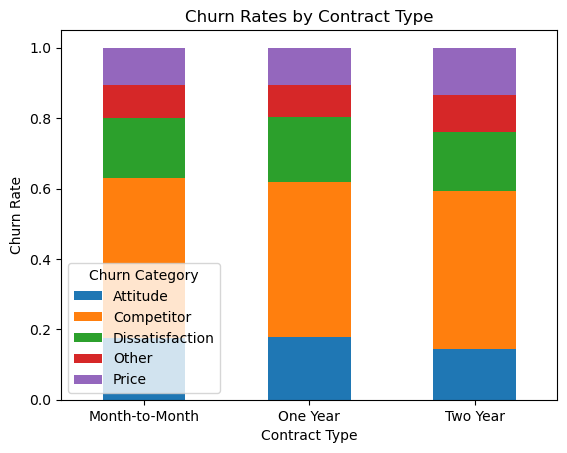

In [109]:
#How does the choice of contract (month-to-month, one-year, two-year) impact churn rates?
# Group data by contract type and calculate churn rates
contract_churn_rates = df.groupby('Contract')['Churn Category'].value_counts(normalize=True).unstack()

# Visualize churn rates
contract_churn_rates.plot(kind='bar', stacked=True)
plt.title('Churn Rates by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(title='Churn Category')
plt.xticks(rotation=0)
plt.show()

In [53]:
#Are there any correlations between billing preferences and churn behavior?

from scipy.stats import chi2_contingency

# Create a cross-tabulation of billing preference and churn behavior
cross_tab = pd.crosstab(df['Paperless Billing'], df['Churn Category'])

# Display the cross-tabulation
print("Cross-Tabulation of Billing Preference and Churn Behavior:")
print(cross_tab)

# Perform chi-square test for independence
chi2, p, _, _ = chi2_contingency(cross_tab)

# Display the results of the chi-square test
print("\nChi-Square Test Statistic:", chi2)
print("P-value:", p)

Cross-Tabulation of Billing Preference and Churn Behavior:
Churn Category     Attitude  Competitor  Dissatisfaction  No Entry  Other  \
Paperless Billing                                                           
No                      141         339              123      1473     72   
Yes                     173         502              198      2175    110   

Churn Category     Price  
Paperless Billing         
No                    95  
Yes                  116  

Chi-Square Test Statistic: 4.9938830366073335
P-value: 0.41662716706621084


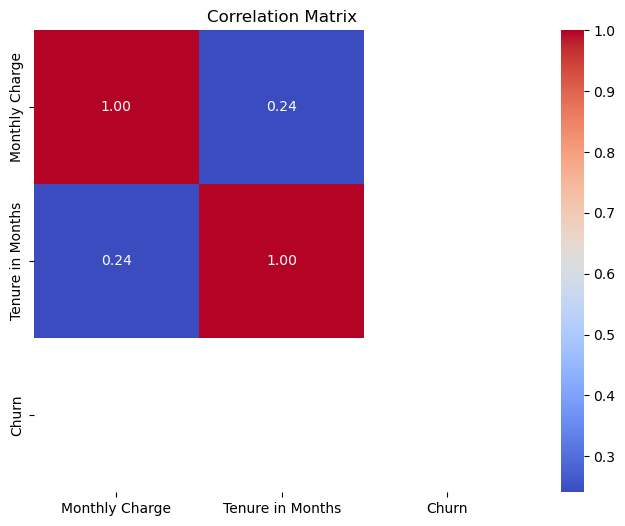

In [56]:
#Is there any correlation between variables such as monthly charges, tenure, and churn?

# Select the relevant columns for analysis
selected_columns = ['Monthly Charge', 'Tenure in Months', 'Churn Category']

# Drop rows with missing values
selected_data = df[selected_columns].dropna()

# Convert 'Churn Category' to numerical values (e.g., 1 for churned, 0 for not churned)
selected_data['Churn'] = (selected_data['Churn Category'] == 'Churned').astype(int)

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

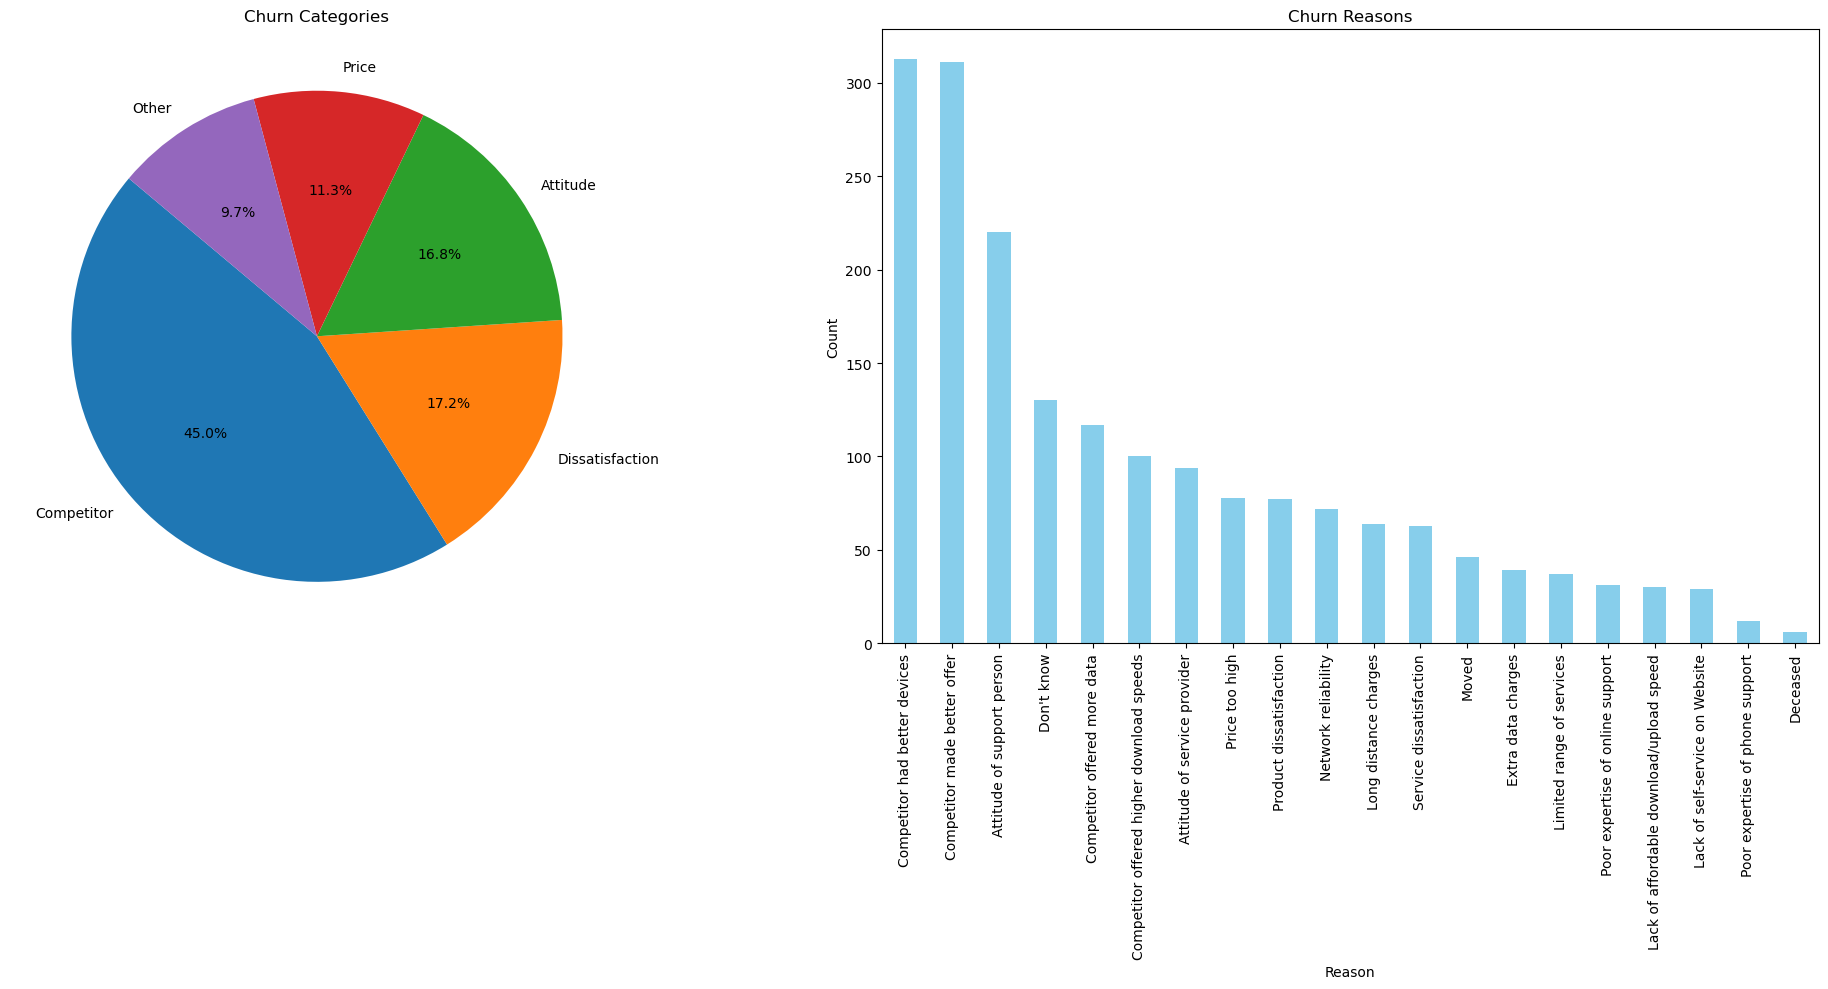

In [123]:
#Visualize the distribution of churn categories and reasons using pie charts or bar graphs.

# Count the occurrences of each churn category and reason
churn_category_counts = df['Churn Category'].value_counts()
churn_reason_counts = df['Churn Reason'].value_counts()

# Plot pie chart for churn categories
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.pie(churn_category_counts, labels=churn_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Categories')

# Plot bar graph for churn reasons
plt.subplot(1, 2, 2)
churn_reason_counts.plot(kind='bar', color='skyblue')
plt.title('Churn Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()